In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

In [108]:
nullities = pd.read_csv('nullities.csv')
nullities.head(2)

,mod,n,m,nullity
0,2,1,1,0
1,2,1,2,1


In [202]:
def plot_results_for_mod(n):
    R = np.zeros((16, 16))
    for _, r in nullities.query('mod == {}'.format(n)).iterrows():
        R[r.n-1][r.m-1] = r['nullity']
    plt.title(r'$nullity(A\%{})$'.format(n), fontsize=14)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$n$')
    cmap = plt.get_cmap('jet', 10)
    img = plt.imshow(R[:11,:11], interpolation='none', vmin=0, vmax=10, extent=[2,12,12,2], cmap=cmap)
    plt.colorbar(img)

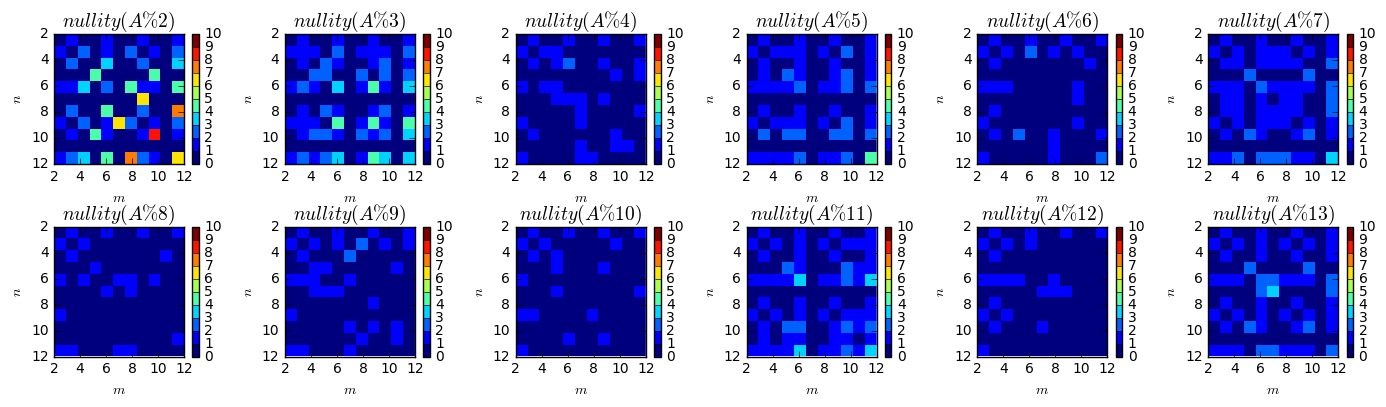

In [203]:
with figure_grid(2, 6, rowwidth=14, rowheight=2) as grid:
    for i in range(2, 14):
        grid.next_subplot()
        plot_results_for_mod(i)

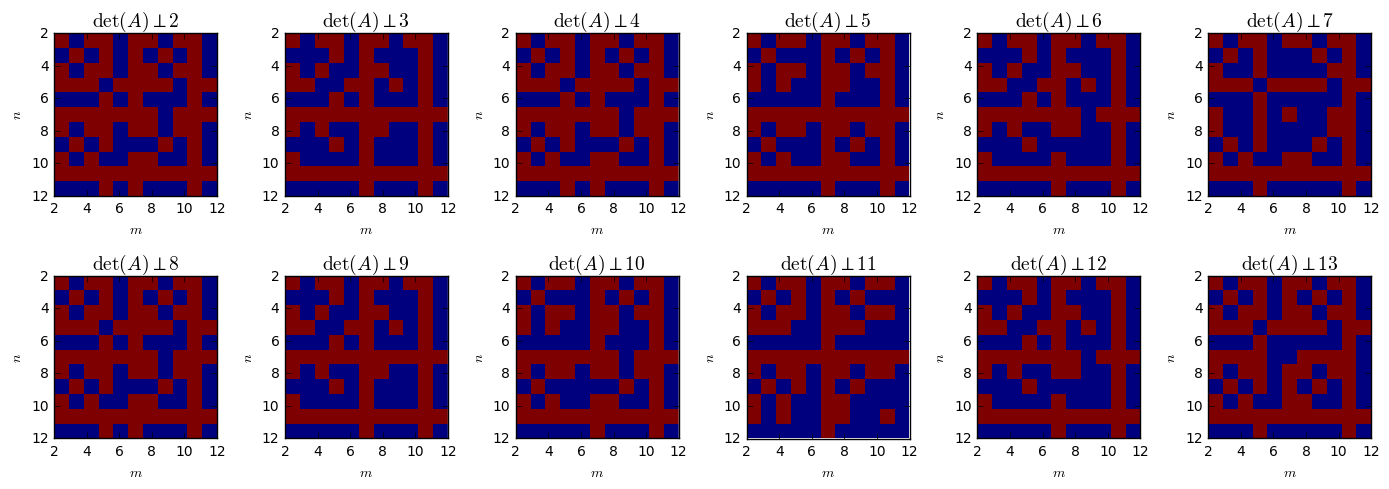

In [188]:
import math
from transition_helpers import *

adj = lambda i, j: [[i,j,1],[i+1,j,1],[i-1,j,1],[i,j+1,1],[i,j-1,1]]

with figure_grid(2, 6, rowwidth=14, rowheight=2.5) as grid:
    for k in range(2, 14):
        R = np.zeros((11, 11), dtype=np.int64)
        for m in range(1, 12):
            for n in range(1, 12):
                A = transition_matrix(adj, n, m, k)
                R[m-1][n-1] = int(math.gcd(k, int(round(np.linalg.det(A.array)))) == 1)
        grid.next_subplot()
        plt.title(r'$\det(A) \perp {}$'.format(k), fontsize=14)
        plt.xlabel(r'$m$')
        plt.ylabel(r'$n$')
        plt.imshow(R, interpolation='none', extent=[2,12,12,2])